In [1]:
# Utility function to print 'string' expression (not statement) & eval with its scope
def sval(string,scope=locals()): print("\n"+string+" ==> "+str(eval(string,scope))+"\n")
#
# !! caution: silent eval error !!
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# To-Do with 케라스 
# 0.상관관계 with heatmap     ---> Done @ #Data Preparation
# 1.정규화                    ---> Done @ #Data Preparation
# 2.train, test 분리          ---> Done @ #Data Preparation
# 3.train[0] 예측                                    --> Done @ # Model Prediction & Accuracy Check
# 4.train : acc score, f1 score, confusion marix     --> half-Done @ # Model Prediction & Accuracy Check
# 5.test  : acc score, f1 score, confusion marix     --> half-Done @ # Model Prediction & Accuracy Check
#
# --> Add f1 score, confusion marix
#

In [2]:
#
# Data Loading
#
bc = load_breast_cancer(as_frame=True)
# bc.keys() --> ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
# bc['target_names'] --> ['malignant' : 0 'benign' : 1] 이진분류 / target과 target_names 연결 ??
# bc['target'] --> Name: target, Length: 569, dtype: int32
df = bc['frame'] # 유방암 data, 569 rows × 31 columns


x_data.shape ==> (569, 30)


y_data.shape ==> (569, 2)



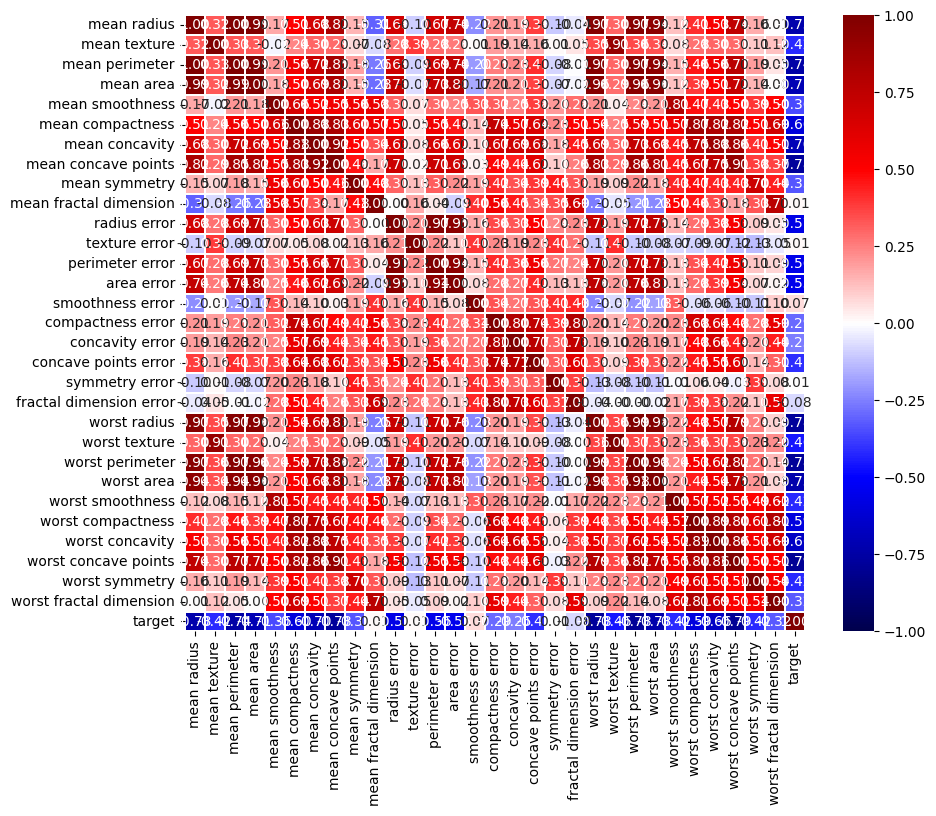

In [3]:
#
# Data Preparation
#
x_data = df.iloc[:,:-1].values
y_data = to_categorical(df['target'].values)
sval('x_data.shape') # x_data.shape ==> (569, 30)  for sklearn.datasets import load_breast_cancer
sval('y_data.shape') # y_data.shape ==> (569, 2)   for sklearn.datasets import load_breast_cancer

plt.figure( figsize=(10,8) )
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, fmt='.2f', cmap='seismic' )
plt.show()

Scaler   = MinMaxScaler()
x_data_N = Scaler.fit_transform(x_data)
x_train, x_test, y_train,y_test = train_test_split(x_data_N, y_data, test_size = 0.3 )


In [4]:
#
#  Model Building & Fit for x_train & y_train data
#
activation='sigmoid';loss='binary_crossentropy'; # 이진분류 --> Dense, model.compile
optimizer = Adam(0.1); metrics=['acc']         ; # To model.compile
epochs    = 500                                ; # To model.fit
input_dim = x_train.shape[1]; sval('input_dim'); # input_dim from x_train
units     = y_train.shape[1]; sval('units')    ; # units from y_train 
#
dense = Dense( input_dim = input_dim, units = units,  activation = activation)
model = Sequential( [dense]) # Single Dense Layer Model
model.compile( loss = loss, optimizer = optimizer , metrics =  metrics )
model.fit( x_train, y_train, epochs   = epochs  )
#


input_dim ==> 30


units ==> 2

Epoch 1/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4772 - acc: 0.8342
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2998 - acc: 0.9121
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2380 - acc: 0.9322
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2090 - acc: 0.9246
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1843 - acc: 0.9372
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1702 - acc: 0.9523
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1638 - acc: 0.9397
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 0.9573
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1356 - acc: 0.9598
Epoch 10/500
13/13 [==============================] - 0s 781us/step - loss: 0.1330 - acc: 0.9673
Epoch 11/500
13/13 [====

In [5]:
#
# Model Prediction & Accuracy Check
#

sval('x_train[0].reshape(1,-1).shape') # (30,) --> (1, 30)
sval('model.predict( x_train[0].reshape(1,-1) )') # --> 3.train[0] 예측

y_train_pred = model.predict(x_train)
y_test_pred  = model.predict(x_test)

sval('accuracy_score( y_train.argmax(axis=1), y_train_pred.argmax(axis=1))') # 4.train : accuracy_score  
sval('accuracy_score( y_test.argmax(axis=1),  y_test_pred.argmax(axis=1))')  # 5.test  : accuracy_score



x_train[0].reshape(1,-1).shape ==> (1, 30)

1/1 [==============================] - 0s 80ms/step

model.predict( x_train[0].reshape(1,-1) ) ==> [[2.086049e-05 9.999794e-01]]

6/6 [==============================] - 0s 4ms/step

accuracy_score( y_train.argmax(axis=1), y_train_pred.argmax(axis=1)) ==> 0.9899497487437185


accuracy_score( y_test.argmax(axis=1),  y_test_pred.argmax(axis=1)) ==> 0.9707602339181286

